In [1]:
import xarray as xr
import numpy as np
import time
t0 = time.time() # marks start
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import geopandas as gp

print(xr.__version__)
print(gp.__version__)

2022.10.0
0.12.1


In [11]:
a = xr.open_dataset('GLDAS_NOAH025_M.A202207.021.nc4')
# a

b = xr.open_dataset('GLDASp5_domveg_NOAH3.6_025d.nc4')
a

<xarray.Dataset>
Dimensions:                (lat: 600, lon: 1440, time: 1, bnds: 2)
Coordinates:
  * lat                    (lat) float32 -59.88 -59.62 -59.38 ... 89.62 89.88
  * lon                    (lon) float32 -179.9 -179.6 -179.4 ... 179.6 179.9
  * time                   (time) datetime64[ns] 2022-07-01
Dimensions without coordinates: bnds
Data variables: (12/37)
    time_bnds              (time, bnds) datetime64[ns] ...
    Swnet_tavg             (time, lat, lon) float32 ...
    Lwnet_tavg             (time, lat, lon) float32 ...
    Qle_tavg               (time, lat, lon) float32 ...
    Qh_tavg                (time, lat, lon) float32 ...
    Qg_tavg                (time, lat, lon) float32 ...
    ...                     ...
    Rainf_f_tavg           (time, lat, lon) float32 ...
    Tair_f_inst            (time, lat, lon) float32 ...
    Qair_f_inst            (time, lat, lon) float32 ...
    Psurf_f_inst           (time, lat, lon) float32 ...
    SWdown_f_tavg          (time, lat, lon) float32 ...
    LWdown_f_tavg          (time, lat, lon) float32 ...
Attributes: (12/16)
    missing_value:          -9999.0
    tavg definition::       past 3-hour average
    acc definition::        past 3-hour accumulation
    inst definition::       instantaneous
    title:                  GLDAS2.1 LIS land surface model output monthly mean
    institution:            NASA GSFC
    ...                     ...
    comment:                website: https://ldas.gsfc.nasa.gov/gldas, https:...
    MAP_PROJECTION:         EQUIDISTANT CYLINDRICAL
    SOUTH_WEST_CORNER_LAT:  -59.875
    SOUTH_WEST_CORNER_LON:  -179.875
    DX:                     0.25
    DY:                     0.25

In [3]:
a

<xarray.Dataset>
Dimensions:                (lat: 600, lon: 1440, time: 1, bnds: 2)
Coordinates:
  * lat                    (lat) float32 -59.88 -59.62 -59.38 ... 89.62 89.88
  * lon                    (lon) float32 -179.9 -179.6 -179.4 ... 179.6 179.9
  * time                   (time) datetime64[ns] 2022-07-01
Dimensions without coordinates: bnds
Data variables: (12/37)
    time_bnds              (time, bnds) datetime64[ns] ...
    Swnet_tavg             (time, lat, lon) float32 ...
    Lwnet_tavg             (time, lat, lon) float32 ...
    Qle_tavg               (time, lat, lon) float32 ...
    Qh_tavg                (time, lat, lon) float32 ...
    Qg_tavg                (time, lat, lon) float32 ...
    ...                     ...
    Rainf_f_tavg           (time, lat, lon) float32 ...
    Tair_f_inst            (time, lat, lon) float32 ...
    Qair_f_inst            (time, lat, lon) float32 ...
    Psurf_f_inst           (time, lat, lon) float32 ...
    SWdown_f_tavg          (time, lat, lon) float32 ...
    LWdown_f_tavg          (time, lat, lon) float32 ...
Attributes: (12/16)
    missing_value:          -9999.0
    tavg definition::       past 3-hour average
    acc definition::        past 3-hour accumulation
    inst definition::       instantaneous
    title:                  GLDAS2.1 LIS land surface model output monthly mean
    institution:            NASA GSFC
    ...                     ...
    comment:                website: https://ldas.gsfc.nasa.gov/gldas, https:...
    MAP_PROJECTION:         EQUIDISTANT CYLINDRICAL
    SOUTH_WEST_CORNER_LAT:  -59.875
    SOUTH_WEST_CORNER_LON:  -179.875
    DX:                     0.25
    DY:                     0.25

In [3]:
c = gp.read_file('../../data/shapes/columbia/Columbia_Basin_Watershed_Boundary.shp')
c.crs

<Geographic 2D CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
d = gp.read_file('../../data/shapes/yukon/linesegs_yukon/YRW_line.shp')
e = gp.read_file('../../data/shapes/yukon/3331.shp')

d.crs

<Derived Projected CRS: PROJCS["NAD83 Alaska Albers Equal Area USGS",GEOGC ...>
Name: NAD83 Alaska Albers Equal Area USGS
Axis Info [cartesian]:
- [east]: Easting (Meter)
- [north]: Northing (Meter)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers_Conical_Equal_Area
Datum: NAD 83
- Ellipsoid: GRS 80
- Prime Meridian: Greenwich

In [6]:
e.crs

<Geographic 2D CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

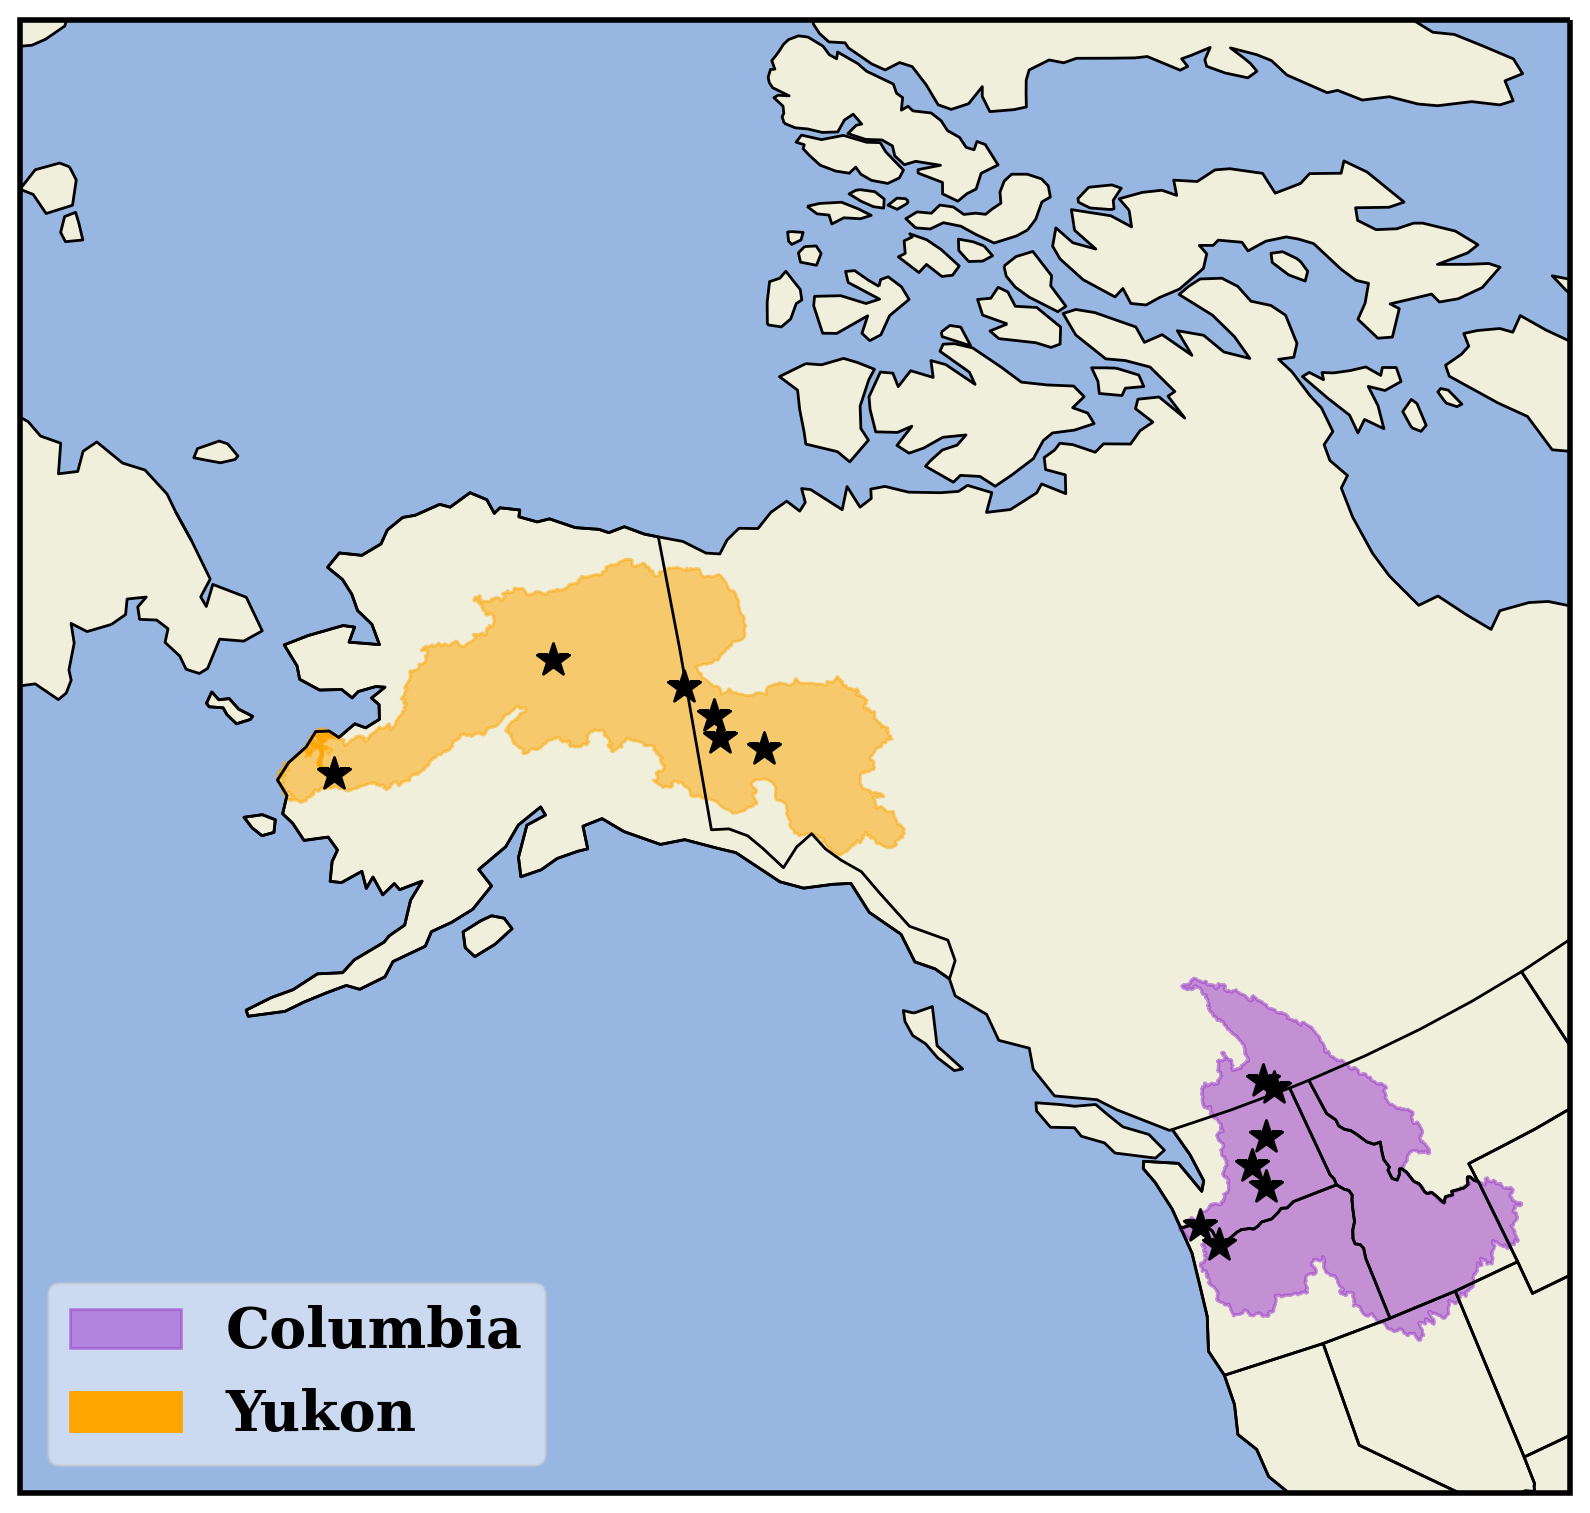

time elapsed:	2395.634


In [65]:
# veg = a.Qs_acc[0]

#changes typeface
plt.rcParams["font.family"] = "DejaVu Serif"
plt.rcParams['font.size'] = 8
plt.rcParams['figure.dpi'] = 200
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['font.weight'] = "bold"
plt.rcParams['legend.framealpha'] = .5


columbia_12436500 = [47.965556, -118.981667]
columbia_12462600 = [47.3325, -120.08]
columbia_12472800 = [46.628889, -119.863611]
columbia_14211720 = [45.5175, -122.669167]
columbia_14246900 = [46.181389, -123.182222]
columbia_08NE049 = [49.177778, -117.7175]
columbia_08NE087 = [49.448333, -118.041944]


yukon_15356000 = [64.7892,-141.2001]
yukon_15453500 = [65.875556, -149.717778]
yukon_15565447 = [61.934444, -162.880556]
yukon_09AH003 = [62.567778, -137.009444]
yukon_09CD001 = [63.0825, -139.496944]
yukon_09EB003 = [63.77, -139.629444]


points = [columbia_12436500,
          columbia_12462600, 
          columbia_12472800, 
          columbia_14211720, 
          columbia_14246900,
          columbia_08NE049,
          columbia_08NE087,
          yukon_15356000,
          yukon_15453500,
          yukon_15565447,
          yukon_09AH003,
          yukon_09CD001,
          yukon_09EB003]

fig = plt.figure(figsize=(10,10)) #create a figure object, blank square on the screen
ax = fig.add_subplot(1, 1, 1, projection=cartopy.crs.Orthographic(-151,36)) #creates single plot for the blank square, states the coordinate system that all everything will be plotted with

# make the map global rather than have it zoom in to
# the extents of any plotted data
ax.set_extent([-170, -110, 40, 90])
ax.coastlines() #adds coastlines
ax.add_feature(cfeature.STATES,zorder=2) #states
ax.add_feature(cfeature.LAND) #land
ax.add_feature(cfeature.OCEAN) #ocean
ax.add_geometries(c.geometry,crs=ccrs.PlateCarree(),color='darkorchid',alpha=.5)
ax.add_geometries(d.geometry,crs=ccrs.epsg(3338),color='orange',alpha=.5) 
ax.scatter([i[1] for i in points],[i[0] for i in points],marker='*',s=150,edgecolors='black',facecolor='black',transform=ccrs.PlateCarree(),zorder=50)

columbia = mpatches.Patch(color='darkorchid',label='Columbia',alpha=.5)
yukon = mpatches.Patch(color='orange',label='Yukon')


ax.legend(handles=[columbia,yukon],loc='lower left',fontsize=20) # creates legend
plt.savefig('../../data/columb_yukon_mapped_notitle.png',bbox_inches='tight') ## saves figure
plt.show() ## plots figure

t1 = time.time() # marks completion
ccrs.epsg(26912)
print(f"time elapsed:\t{round(t1-t0,3)}")

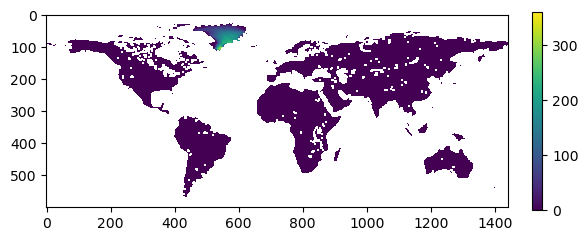

In [11]:
plt.imshow(np.flipud(a.SnowDepth_inst[0]))
plt.colorbar(fraction=0.02)